# Table of Contents
* [1. 1D Simple model](#1.-1D-Simple-model)
	* [1.1 getting quantitative data](#1.1-getting-quantitative-data)
		* [1.1.1 stability vs number of species](#1.1.1-stability-vs-number-of-species)
		* [1.1.2 stability vs nutrient content](#1.1.2-stability-vs-nutrient-content)
	* [1.2 2D](#1.2-2D)
	* [1.3 mix of suiciders and survivors](#1.3-mix-of-suiciders-and-survivors)
		* [1.3.1 quantitative simulation data for mix of suiciders and survivors](#1.3.1-quantitative-simulation-data-for-mix-of-suiciders-and-survivors)


# Model

## diversity vs nutrient concentration
### pairwise interaction vs nutrient concentrationv (Fig. 3 and Supplementary Fig. 17a)

In [121]:
##-> restart kernel before starting this code

%pylab inline
from scipy.integrate import odeint,ode
from model_aux import Ma, simul, diversity
from seaborn import swarmplot
from pandas import DataFrame
import seaborn as sns
from matplotlib import patches

interaction_str=[0,1e-10,1e-9,1e-8,1e-6,1e-5,1e-4,1e-2]


repeats=40
NrSp=2
ps=[]

for i in interaction_str:
    print(i)
    for j in range(repeats):
        print(j)
        te=simul(NrSp,i)
        if sum(te[-1,:-1])>0:
            ps.append(te[-1,:-1]/sum(te[-1,:-1]))
        else:
            ps.append(array([0,0]))

dive_pair1=[diversity(x) for x in ps]
dive_pairs_res1=reshape(dive_pair1,(len(interaction_str),repeats))

Populating the interactive namespace from numpy and matplotlib
0
0


/home/cr/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sys']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
1e-10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
1e-09
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
1e-08
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
1e-06
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
1e-05
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0.0001
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0.01
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


/home/cr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:15: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.
  from ipykernel import kernelapp as app


Text(0, 0.5, '$final \\, diversity \\, ({}^{1}D)$')

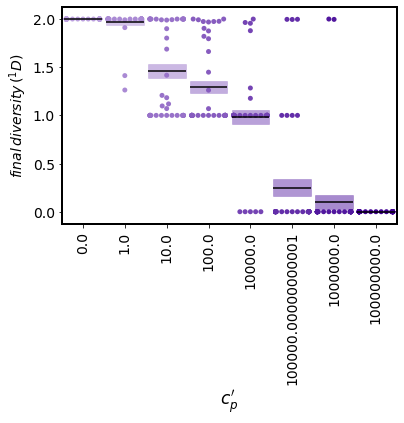

In [122]:
rcParams['font.size']=14
rcParams['axes.linewidth']=2

pal=sns.light_palette((64/255., 0, 148/255.), n_colors=11, input="rgb")
sem=std(dive_pairs_res1,axis=1)/sqrt(40)

ax=subplot(111)
swarmplot(data=dive_pairs_res1.T, color='r', palette=pal[3:], zorder=1)

hlines(mean(dive_pairs_res1,axis=1),arange(8)-.45,arange(8)+.45)

for i in range(len(interaction_str)):
    rec=patches.Rectangle((i-0.45,mean(dive_pairs_res1,axis=1)[i]-sem[i]),.9,2*sem[i],linewidth=.5,edgecolor='none'
                          , color=pal[3:][i]
                       , alpha=0.5)
    ax.add_patch(rec)


xticks(arange(len(interaction_str)),array(interaction_str)*1e10, rotation=90)

xlabel('$c^{\prime}_{p}$', size=17)

ylabel('$final \, diversity \, ({}^{1}D)$')


### complex biodiversity vs nutrient content (Fig. 3 and Supplementary Fig. 17b)


In [123]:
%pylab inline

from model_aux import simul

interaction_str=[0,1e-10,1e-9,1e-8,1e-6,1e-5,1e-4,1e-2]
repeats=20
NrSp=20
ps=[]

for i in interaction_str:
    print(i)
    for j in range(repeats):
        print(j)
        te=simul(NrSp,i)
        if sum(te[-1,:-1])>0:
            ps.append(te[-1,:-1]/sum(te[-1,:-1]))
        else:
            ps.append(array([0,0]))

Populating the interactive namespace from numpy and matplotlib
0
0


/home/cr/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rec']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1e-10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1e-09
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1e-08
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1e-06
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
1e-05
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0.0001
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
0.01
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [124]:
from model_aux import diversity_com


pw_re=array(ps)

dive_compl=[diversity_com(x) for x in pw_re]
tes=reshape(dive_compl,(len(interaction_str),repeats))

Populating the interactive namespace from numpy and matplotlib


/home/cr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:23: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


Text(0, 0.5, '$final \\, diversity \\, ({}^{1}D)$')

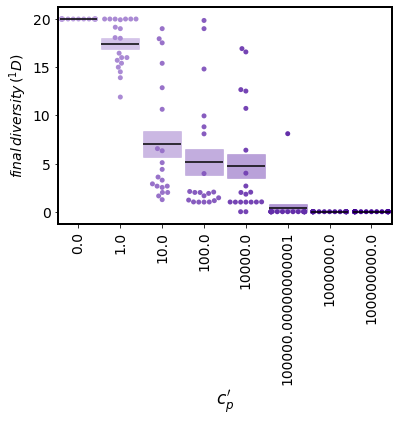

In [125]:
%pylab inline
import seaborn as sns
import _pickle as pickle
rcParams['font.size']=14
rcParams['axes.linewidth']=2


sem=std(tes,axis=1)/sqrt(repeats)


pal=sns.light_palette((64/255., 0, 148/255.), n_colors=11, input="rgb")


ax=subplot(111)

hlines(mean(tes,axis=1),arange(8)-.45,arange(8)+.45)

sns.swarmplot(data=tes.T, palette=pal[3:], zorder=1)


for i in range(len(interaction_str)):
    rec=patches.Rectangle((i-0.45,mean(tes,axis=1)[i]-sem[i]),.9,2*sem[i],linewidth=.5,edgecolor='none', color=pal[3:][i]
                       , alpha=0.5)
    ax.add_patch(rec)
    
xticks(arange(len(interaction_str)),array(interaction_str)*1e10, rotation=90)

xlabel('$c^{\prime}_{p}$', size=17)

ylabel('$final \, diversity \, ({}^{1}D)$')

#savefig('../writing/supplement/supp_figs/complex_system_stability_bs_interaction.png', transparence=1, dp=300)

## biodiversity vs number of species (Supplementary Fig. 17c)

In [126]:
%pylab inline

from model_aux import simul

interaction_str=1e-8
repeats=20
NrSp=[2,4,10,15,20,40,100]
ps_all=[]
ps=[]
for i in NrSp:
    print('nrSp: '+str(i))
 
    for j in range(repeats):
        print(j)
        te=simul(i,interaction_str)
        if sum(te[-1,:-1])>0:
            ps.append(te[-1,:-1]/sum(te[-1,:-1]))
        else:
            ps.append(array([0,0]))
    ps_all.append(ps)

Populating the interactive namespace from numpy and matplotlib
nrSp: 2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
nrSp: 4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
nrSp: 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
nrSp: 15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
nrSp: 20
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
nrSp: 40
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
nrSp: 100
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [127]:
from model_aux import diversity_com
div=[]
for i in ps:
    div.append(diversity_com(i))
div_re=reshape(div,(len(NrSp),repeats))
div_norm=div_re.T/NrSp

Text(0.5, 0, 'initial number of species')

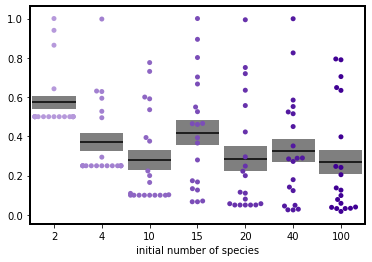

In [138]:
import seaborn as sns
from matplotlib import patches

pal=sns.light_palette((64/255., 0, 148/255.), n_colors=10, input="rgb")

ax=sns.swarmplot(data=div_norm, palette=pal[3:])
xticks(range(len(NrSp)),NrSp)
hlines(mean(div_norm, axis=0),arange(len(NrSp))-.45,arange(len(NrSp))+.45)

sem=std(div_norm, axis=0)/sqrt(repeats)
for i in arange(len(NrSp)):
    rect=patches.Rectangle((i-0.45,mean(div_norm, axis=0)[i]-sem[i]),.9,2*sem[i],linewidth=.5,edgecolor='none'
                       , alpha=0.5)
    ax.add_patch(rect)
xlabel('initial number of species')

## diversity vs nutrient concentrations with gaussian function
### pairwise interaction vs nutrient concentrations (Supplementary Fig. 17d)

In [139]:

%pylab inline
from scipy.integrate import odeint,ode
from model_aux import Ma_gauss, simul_gauss

interaction_str=[0,1e-10,1e-9,1e-8,1e-6,1e-5,1e-4,1e-2]


repeats=40
NrSp=2
ps=[]

for i in interaction_str:
    print(i)
    for j in range(repeats):
        print(j)
        te=simul_gauss(NrSp,i)
        if sum(te[-1,:-1])>0:
            ps.append(te[-1,:-1]/sum(te[-1,:-1]))
        else:
            ps.append(array([0,0]))

Populating the interactive namespace from numpy and matplotlib
0
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
1e-10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
1e-09
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
1e-08
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
1e-06
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
1e-05
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0.0001
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
0.01
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39


In [140]:
%pylab inline

from model_aux import diversity


 
    
pw_re1=array(ps)


dive_pair1=[diversity(x) for x in pw_re1]
dive_pairs_res1=reshape(dive_pair1,(len(interaction_str),40))

Populating the interactive namespace from numpy and matplotlib


/home/cr/.local/lib/python3.6/site-packages/ipykernel_launcher.py:20: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


Text(0, 0.5, '$final \\, diversity \\, ({}^{1}D)$')

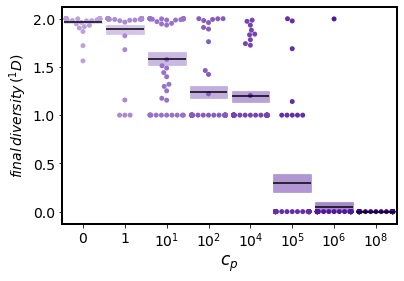

In [141]:
from seaborn import swarmplot
from pandas import DataFrame
import seaborn as sns
from matplotlib import patches

rcParams['font.size']=14
rcParams['axes.linewidth']=2

pal=sns.light_palette((64/255., 0, 148/255.), n_colors=11, input="rgb")
sem=std(dive_pairs_res1,axis=1)/sqrt(40)

ax=subplot(111)
swarmplot(data=dive_pairs_res1.T, color='r', palette=pal[3:], zorder=1)

hlines(mean(dive_pairs_res1,axis=1),arange(8)-.45,arange(8)+.45)

for i in range(8):
    rec=patches.Rectangle((i-0.45,mean(dive_pairs_res1,axis=1)[i]-sem[i]),.9,2*sem[i],linewidth=.5,edgecolor='none'
                          , color=pal[3:][i]
                       , alpha=0.5)
    ax.add_patch(rec)




xticks(arange(8),['$0$','$1$','$10^{1}$','$10^{2}$','$10^{4}$','$10^{5}$','$10^{6}$','$10^{8}$'])
xlabel('$c_{p}$', size=17)

ylabel('$final \, diversity \, ({}^{1}D)$')


###  complex community vs nutrient concentratioins (Supplementary Fig. 17e)


In [ ]:
%pylab inline

from model_aux import simul_gauss

interaction_str=[0,1e-10,1e-9,1e-8,1e-6,1e-5,1e-4,1e-2]
repeats=20
NrSp=20
ps=[]

for i in interaction_str:
    print(i)
    for j in range(repeats):
        print(j)
        te=simul_gauss(NrSp,i)
        if sum(te[-1,:-1])>0:
            ps.append(te[-1,:-1]/sum(te[-1,:-1]))
        else:
            ps.append(array([0,0]))

Populating the interactive namespace from numpy and matplotlib
0
0


/home/cr/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rec']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [2]:
from model_aux import diversity_com


pw_re=array(ps)

dive_compl=[diversity_com(x) for x in pw_re]
te=reshape(dive_compl,(8,20))

Populating the interactive namespace from numpy and matplotlib


/home/cr/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['rec']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/usr/local/lib/python3.6/dist-packages/matplotlib/patches.py:83: UserWarning: Setting the 'color' property will overridethe edgecolor or facecolor properties. 
  warnings.warn("Setting the 'color' property will override"


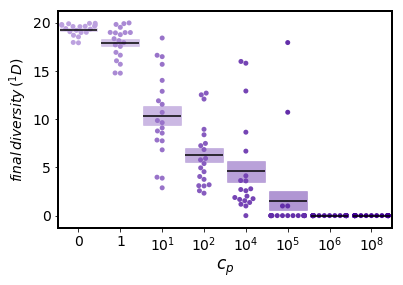

In [8]:
%pylab inline
import seaborn as sns
import _pickle as pickle
from matplotlib import patches
rcParams['font.size']=14
rcParams['axes.linewidth']=2

tes=te
    
    


interaction_str=[0,1e-10,1e-9,1e-8,1e-6,1e-5,1e-4,1e-2]

sem=std(tes,axis=1)/sqrt(20)


pal=sns.light_palette((64/255., 0, 148/255.), n_colors=11, input="rgb")


ax=subplot(111)

hlines(mean(tes,axis=1),arange(8)-.45,arange(8)+.45)

sns.swarmplot(data=tes.T, palette=pal[3:], zorder=1)


for i in range(8):
    rec=patches.Rectangle((i-0.45,mean(tes,axis=1)[i]-sem[i]),.9,2*sem[i],linewidth=.5,edgecolor='none', color=pal[3:][i]
                       , alpha=0.5)
    ax.add_patch(rec)
    


xticks(arange(8),['$0$','$1$','$10^{1}$','$10^{2}$','$10^{4}$','$10^{5}$','$10^{6}$','$10^{8}$'])

xlabel('$c_{p}$', size=17)

ylabel('$final \, diversity \, ({}^{1}D)$')



### diversity vs number of species (Supplementary Fig. 17f)

In [1]:
%pylab inline

from model_aux import simul_gauss

interaction_str=1e-8
repeats=20
NrSp=[2,4,10,15,20,40,100]
ps_all=[]
ps=[]
for i in NrSp:
    print('nrSp: '+str(i))
 
    for j in range(repeats):
        print(j)
        te=simul_gauss(i,interaction_str)
        if sum(te[-1,:-1])>0:
            ps.append(te[-1,:-1]/sum(te[-1,:-1]))
        else:
            ps.append(array([0,0]))
    ps_all.append(ps)

Populating the interactive namespace from numpy and matplotlib
nrSp: 2
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
nrSp: 4
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
nrSp: 10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
nrSp: 15
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
nrSp: 20
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
nrSp: 40
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
nrSp: 100
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [4]:
from model_aux import diversity_com
div=[]
for i in ps:
    div.append(diversity_com(i))
div_re=reshape(div,(len(NrSp),repeats))
div_norm=div_re.T/NrSp

/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 216, got 192
  return f(*args, **kwds)
/usr/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


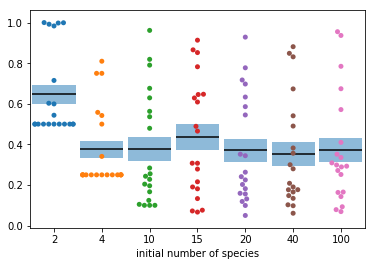

In [5]:
import seaborn as sns
from matplotlib import patches


ax=sns.swarmplot(data=div_norm)
xticks(range(len(NrSp)),NrSp)
hlines(mean(div_norm, axis=0),arange(len(NrSp))-.45,arange(len(NrSp))+.45)

sem=std(div_norm, axis=0)/sqrt(repeats)
for i in arange(len(NrSp)):
    rect=patches.Rectangle((i-0.45,mean(div_norm, axis=0)[i]-sem[i]),.9,2*sem[i],linewidth=.5,edgecolor='none'
                       , alpha=0.5)
    ax.add_patch(rect)
xlabel('initial number of species')

savefig('../writing/supplement/supp_figs/diversity_vs_nrsp.svg', transparent=1, bbox_inches='tight')

## total biomass and environmental parameter vs interaction strength
###  for pairs (Supplementary Fig. 11 and Supplementary Fig. 18)

In [67]:
%pylab inline
from model_aux import simul, Ma

interaction_str=[0,1e-10,1e-9,1e-8,1e-7,1e-6]
repeats=20
NrSp=2

od_dic={}
pH_dic={}

for i in interaction_str:
    print(i)
    ps=[]
    for j in range(repeats):
        print(j)
        te=simul(NrSp,i)
        ps.append(te[::10000])
    od_dic[i]=sum(array(ps)[:,:,:-1],axis=2)  
    pH_dic[i]=array(ps)[:,:,-1]

Populating the interactive namespace from numpy and matplotlib
0
0
1
1e-10
0
1
1e-09
0
1
1e-08
0
1
1e-07
0
1
1e-06
0
1


Populating the interactive namespace from numpy and matplotlib








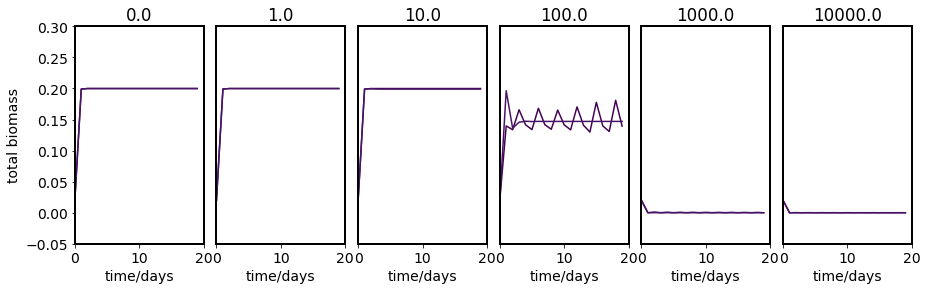

In [68]:
%pylab inline
rcParams['axes.linewidth']=2
rcParams['font.size']=14



# total population density vs time
gs=GridSpec(1,len(interaction_str), wspace=0.1)
figure(figsize=(15,4))
titles=['0','$10^{0}$']
colors = [plt.cm.viridis(i) for i in np.linspace(0, 1, 20)]


for i in range(len(interaction_str)):
    ax=subplot(gs[i])
    ax.set_prop_cycle(cycler('color', colors))
    ax.plot(od_dic[interaction_str[i]].T[:20])
    title(str(interaction_str[i]*1e10))
    
    ylabel('total biomass')
    xlabel('time/days')
    if i!=0:
        ylabel('')
        yticks([])
    #yscale('symlog')
    axis([0,20,-.05,.3])
    print('')


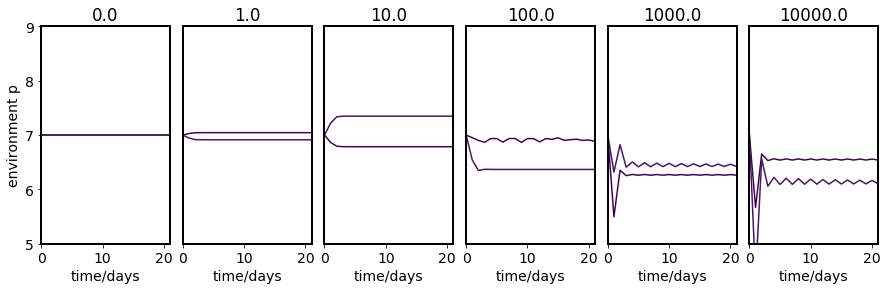

In [69]:
# environmental parameter vs time
rcParams['axes.linewidth']=2
rcParams['font.size']=14
gs=GridSpec(1,len(interaction_str), wspace=0.1)

colors = [plt.cm.viridis(i) for i in np.linspace(0, 1, 20)]
    
figure(figsize=(15,4))
for i in range(len(interaction_str)):
    ax=subplot(gs[i])
    ax.set_prop_cycle(cycler('color', colors))
    ax.plot(pH_dic[interaction_str[i]].T)
    title(interaction_str[i]*1e10)
    xlabel('time/days')
    ylabel('environment p')
    if i!=0:
        yticks([])
        ylabel('')
    axis([0,21,5,9])
    #yscale('symlog')
    print('')

### for complex communities (Fig. 4a,b and Supplementary Fig. 19)

In [70]:
%pylab inline
from model_aux import simul, Ma

interaction_str=[0,1e-10,1e-9,1e-8,1e-7]
repeats=2 #   20
NrSp=20

od_dic_c={}
pH_dic_c={}

for i in interaction_str:
    print(i)
    ps=[]
    for j in range(repeats):
        print(j)
        te=simul(NrSp,i)
        ps.append(te[::10000])
    od_dic_c[i]=sum(array(ps)[:,:,:-1],axis=2)  
    pH_dic_c[i]=array(ps)[:,:,-1]

Populating the interactive namespace from numpy and matplotlib
0
0
1
1e-10
0
1
1e-09
0
1
1e-08
0
1
1e-07
0
1


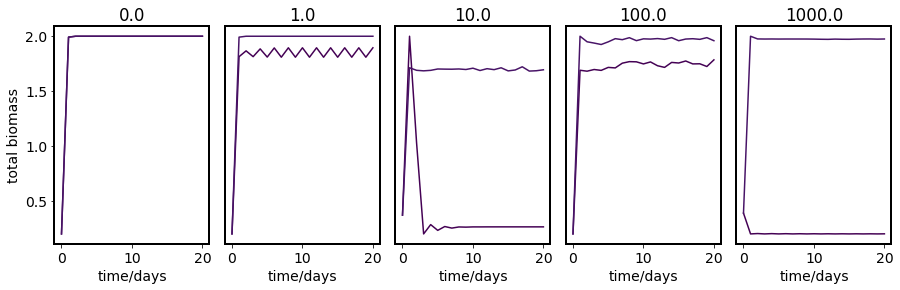

In [71]:
# total population density vs time
rcParams['axes.linewidth']=2
rcParams['font.size']=14

gs=GridSpec(1,5, wspace=0.1)
colors = [plt.cm.viridis(i) for i in np.linspace(0, 1, 20)]
     
    
figure(figsize=(15,4))
for i in range(5):
    ax=subplot(gs[i])
    ax.set_prop_cycle(cycler('color', colors))
    ax.plot(od_dic_c[interaction_str[i]].T[:21])
    title(interaction_str[i]*1e10)
    xlabel('time/days')
    ylabel('total biomass')
    if i!=0:
        yticks([])
        ylabel('')
    print('')


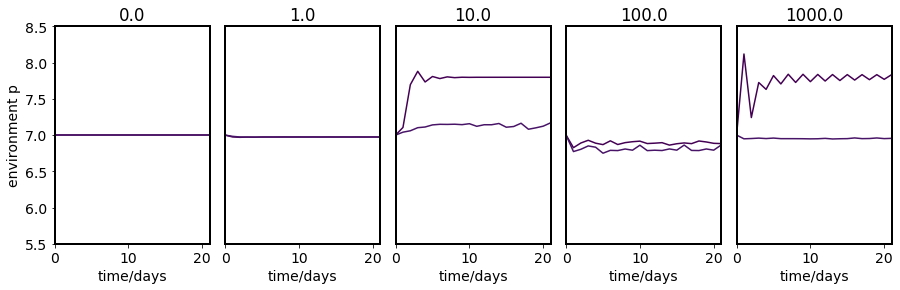

In [72]:
# environmental parameter vs time
rcParams['axes.linewidth']=2
rcParams['font.size']=14

gs=GridSpec(1,5, wspace=0.1)
colors = [plt.cm.viridis(i) for i in np.linspace(0, 1, 20)]
     


interaction_str=[0,1e-10,1e-9,1e-8,1e-7]
figure(figsize=(15,4))
for i in range(5):
    ax=subplot(gs[i])
    ax.set_prop_cycle(cycler('color', colors))
    ax.plot(pH_dic_c[interaction_str[i]].T)
    title(interaction_str[i]*1e10)
    xlabel('time/days')
    ylabel('environment p')
    if i!=0:
        yticks([])
        ylabel('')
        
    axis([0,21,5.5,8.5])
    print('')


## multistability vs interaction strength
### for pairs 

In [77]:
%pylab inline
from model_aux import simulbis2, Ma

interaction_str=[1e-10,1e-8]
repeats=30
NrSp=2

#intial start densities for two species
logNr=array([100*1/2**x for x in arange(8)])/1e8
init_bacs=vstack([logNr,logNr[::-1]]).T

bis_res_all=[]
for j in range(repeats):
    #interaction and reaction parameters
    po=random_sample(size=NrSp)*5.+4.5
    pc=(array([2.5]*NrSp)).astype('float')
    cpp=2*(random_sample(size=NrSp)-0.5)
    bis_res=[]
    print(j)
    for i in interaction_str:
        print(i)
        cp=cpp*i
        ps=[]
        print(cp)
        for k in init_bacs:
            print('init'+str(k))
            te=simulbis2(k,po,pc,cp)
            ps.append(vstack([k,te]))
        bis_res.append(ps)      
    bis_res_all.append(bis_res)
    
tee=array(bis_res_all)


Populating the interactive namespace from numpy and matplotlib
0
1e-10
[ 8.55408942e-12 -3.95774568e-11]
init[1.0000e-06 7.8125e-09]
init[5.0000e-07 1.5625e-08]
init[2.500e-07 3.125e-08]
init[1.25e-07 6.25e-08]
init[6.25e-08 1.25e-07]
init[3.125e-08 2.500e-07]
init[1.5625e-08 5.0000e-07]
init[7.8125e-09 1.0000e-06]
1e-08
[ 8.55408942e-10 -3.95774568e-09]
init[1.0000e-06 7.8125e-09]
init[5.0000e-07 1.5625e-08]
init[2.500e-07 3.125e-08]
init[1.25e-07 6.25e-08]
init[6.25e-08 1.25e-07]
init[3.125e-08 2.500e-07]
init[1.5625e-08 5.0000e-07]
init[7.8125e-09 1.0000e-06]
1
1e-10
[ 1.44413803e-11 -7.05505467e-11]
init[1.0000e-06 7.8125e-09]
init[5.0000e-07 1.5625e-08]
init[2.500e-07 3.125e-08]
init[1.25e-07 6.25e-08]
init[6.25e-08 1.25e-07]
init[3.125e-08 2.500e-07]
init[1.5625e-08 5.0000e-07]
init[7.8125e-09 1.0000e-06]
1e-08
[ 1.44413803e-09 -7.05505467e-09]
init[1.0000e-06 7.8125e-09]
init[5.0000e-07 1.5625e-08]
init[2.500e-07 3.125e-08]
init[1.25e-07 6.25e-08]
init[6.25e-08 1.25e-07]
init[3.

In [79]:
tee=array(bis_res_all)
ct=[]
for i in range(repeats):
    ct.append(tee[i,:,:,:,0]/sum(tee[i],axis=3))

#### low interaction strength (Supplementary Fig. 20)

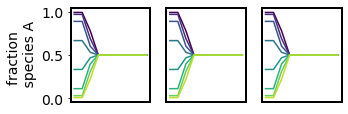

In [85]:


colors = [plt.cm.viridis(i) for i in np.linspace(0, .9, 8)]

gs=GridSpec(5,6)
figure(figsize=(10,10))
for i in range(repeats):
    ax=subplot(gs[i])
    ax.set_prop_cycle(cycler('color', colors))
    ax.plot(array(ct)[i,0].T[:10])
    if i%6!=0:
        yticks([])  
    if i%6==0:
        ylabel('fraction \n species A')
    if i<24:
        xticks([])
    if i>23:
        xlabel('time/days')

#savefig('../writing/supplement/supp_figs/pairs_dynamics_ln.eps', transparent=1,bbox_inches='tight')

### high interaction strength (Supplementary Fig. 21)

Populating the interactive namespace from numpy and matplotlib


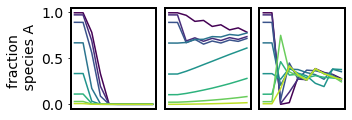

In [84]:
%pylab inline
rcParams['axes.linewidth']=2
rcParams['font.size']=14

interaction_str=[0,1e-10,1e-9,1e-8,1e-6,1e-5]

colors = [plt.cm.viridis(i) for i in np.linspace(0, .9, 8)]

gs=GridSpec(5,6, wspace=0.1,  hspace=0.1)
figure(figsize=(10,10))
for i in range(repeats):
    ax=subplot(gs[i])
    ax.set_prop_cycle(cycler('color', colors))
    ax.plot(array(ct)[i,1].T[:10])
    if i%6!=0:
        yticks([])  
    if i%6==0:
        ylabel('fraction \n species A')
    if i<24:
        xticks([])
    if i>23:
        xlabel('time/days')
        


#### for complex communities (Fig. 4 and Supplementary Fig. 22)

In [100]:
%pylab inline
from scipy import random
from scipy.integrate import odeint
from model_aux import simulbisc,Ma


interaction_str=[1e-10,1e-7]
repeats=50
NrSp=20
K=1e10

systems=[]
for k in range(10):    # cycle over different 'systems'

    bis_res=[]

    #randomly selecting parameters, this is done once, if you want to simulate different systems repeat snipet or make loop
    po=random_sample(size=NrSp)*5.+4.5
    pc=(array([2.5]*NrSp)).astype('float')
    cpp=2*(random_sample(size=NrSp)-0.5)

    for i in interaction_str:
        print(i)
        cp=cpp*i
        bis_res_int=[]
        for j in range(repeats):
            #start every repeat with different initial species densities
            #random intial start densities
            P0=random.rand(NrSp)/100. # 1 equals n' at carrying capacity , /100 for 100 dilution 
        
            print(j)
            sim_res=simulbisc(i,P0,po,pc,cp)
            bis_res_int.append(sim_res)
        bis_res.append(bis_res_int) 
    systems.append(bis_res)

Populating the interactive namespace from numpy and matplotlib
1e-10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
1e-07
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
1e-10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
1e-07
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
1e-10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
1e-07
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
1e-10
0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21

Populating the interactive namespace from numpy and matplotlib


/home/cr/.local/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['sys']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


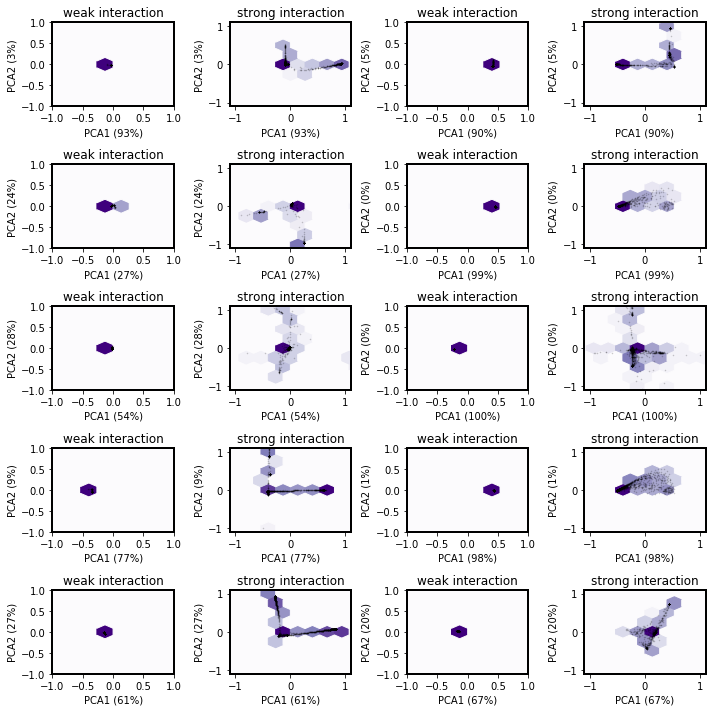

In [120]:
%pylab inline
from sklearn.decomposition import PCA

sys=array(systems)

figure(figsize=(10,10))
gs=GridSpec(5,4)
for k in range(10):
    
    ln_all=concatenate(sys[k,0,:])
    hn_all=concatenate(sys[k,1,:])
    #ln_all_no=(ln_all[:].T/sum(ln_all, axis=1)).T
    #hn_all_no=(hn_all[:].T/sum(hn_all, axis=1)).T
    #normalize to obtain species abundance otherwise pca plots of different interactions conditoins cannot be overlaped
    C=vstack([(ln_all[:].T/sum(ln_all, axis=1)).T,(hn_all[:].T/sum(hn_all, axis=1)).T])
    pca = PCA(n_components=2)
    pca.fit(C)
    C_pca_all = pca.transform(C)
    

    subplot(gs[2*k])
    plot(C_pca_all[:4000].T[0],C_pca_all[:4000].T[1],'k.', zorder=10, markersize=1, alpha=0.2)
    hexbin(C_pca_all[:4000].T[0],C_pca_all[:4000].T[1],gridsize=15, extent=[-2,2,-2,2], cmap='Purples',bins='log')
    xlabel('PCA1 ('+str(int(rint(pca.explained_variance_ratio_[0]*100)))+'%)')
    ylabel('PCA2 ('+str(int(rint(pca.explained_variance_ratio_[1]*100)))+'%)')
    title('weak interaction')
    axis([-1,1,-1,1])
    
    subplot(gs[2*k+1])
    plot(C_pca_all[4000:].T[0],C_pca_all[4000:].T[1],'k.', markersize=1, alpha=0.2)
    hexbin(C_pca_all[4000:].T[0],C_pca_all[4000:].T[1],gridsize=15, extent=[-2,2,-2,2], cmap='Purples',bins='log')
    xlabel('PCA1 ('+str(int(rint(pca.explained_variance_ratio_[0]*100)))+'%)')
    ylabel('PCA2 ('+str(int(rint(pca.explained_variance_ratio_[1]*100)))+'%)')
    title('strong interaction')
    axis([-1.1,1.1,-1.1,1.1])
    
tight_layout()

#savefig('../writing/supplement/supp_figs/complex_comm_multistab.png', dpi=300,transparent=1,bbox_inches='tight' )